# Medical Cost Personal Datasets:

## initializing dataset

In [386]:
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [420]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task_1/insurance 2.csv")

## Data Distribution

| Range | Value | Range | Value | Range | Value |
| ----- | ----- | ----- | ----- | ----- | ----- |
| <2000 | 92    | 6-7   | 73    | 20-25 | 72    |
| 2k-3k | 98    | 7-8   | 68    | 25-30 | 39    |
| 3k-4k | 78    | 8-9   | 78    | 30-35 | 29    |
| 4-5k  | 90    | 9-10  | 64    | 35-40 | 54    |
| 5-6   | 70    | 10-11 | 60    | 40-45 | 41    |
| 11-12 | 74    | 12-13 | 57    | 45-50 | 31    |
| 13-14 | 45    | 14-15 | 32    | 50-55 | 2     |
| 15-16 | 12    | 16-17 | 15    | 55-60 | 2     |
| 17-18 | 18    | 18-19 | 19    | 60-65 | 3     |
| 19-20 | 21    |       |       |       |       |



## Encoding Textual data

In [398]:
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])

In [399]:
df["sex"] = label_encoder.fit_transform(df["sex"])

In [400]:
df["smoker"] = label_encoder.fit_transform(df["smoker"])

In [345]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Splitting into train and test

In [401]:
X = df.iloc[:, 1:6]
X

,sex,bmi,children,smoker,region
0,0,27.900,0,1,3
1,1,33.770,1,0,2
2,1,33.000,3,0,2
3,1,22.705,0,0,1
4,1,28.880,0,0,1
...,...,...,...,...,...
1333,1,30.970,3,0,1
1334,0,31.920,0,0,0
1335,0,36.850,0,0,2
1336,0,25.800,0,0,3


In [402]:
y = df.iloc[:, 6]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## splitting the data into train and test sets


In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Scale the training and test features

In [349]:
minmax = MinMaxScaler(feature_range=(0, 1))
x2 = minmax.fit_transform(X_train[["bmi", "children"]])
X_train[["bmi", "children"]] = x2

In [350]:
x3 = minmax.transform(X_test[["bmi", "children"]])
X_test[["bmi", "children"]] = x3

# Regression

## Training the Model

In [351]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [364]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=200)

y_pred = model.predict(X_test).ravel()

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 13420.0391 - mae: 13420.0391 
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 13218.0527 - mae: 13218.0527
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 11129.7695 - mae: 11129.7695
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 8515.6367 - mae: 8515.6367
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 8068.3262 - mae: 8068.3262
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 7573.3613 - mae: 7573.3613
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 6971.7524 - mae: 6971.7524
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 6362.2627 - mae: 6362.2627
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5924.0132 - mae: 5924.0132 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5713.6089 - mae: 5713.6089 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5535.0913 - mae: 5535.0913 
Epoch 12/200
34/34 ━━━━━━━

In [365]:
lr = LinearRegression()
lr.fit(X_train, y_train)
library_pred = lr.predict(X_test).ravel()

In [366]:
print("for scikitlearn Library = ", r2_score(y_test, library_pred))
print(r2_score(y_test, y_pred))

for scikitlearn Library =  0.6154756805624926
0.6903229780998034


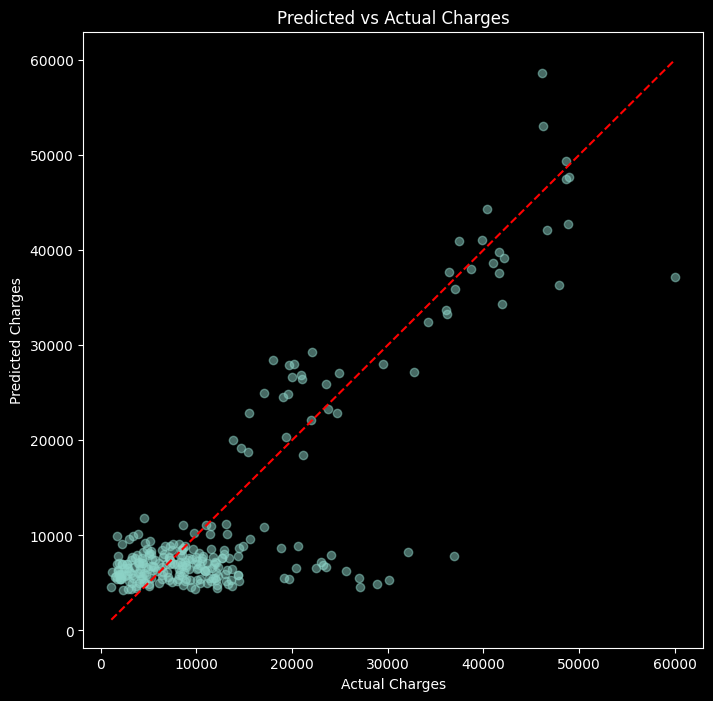

In [367]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()


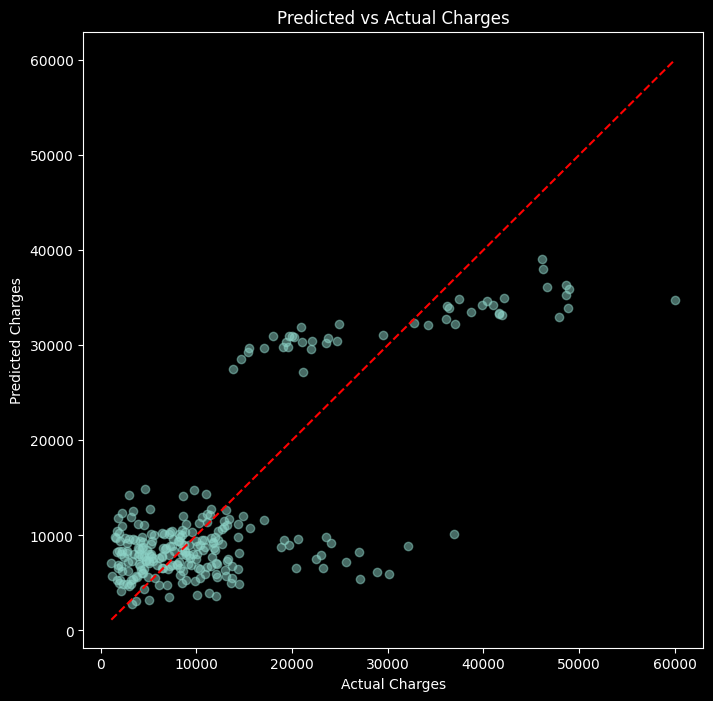

In [368]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, library_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [404]:
X_train

,sex,bmi,children,smoker,region
714,0,22.600,0,0,3
441,0,33.500,0,1,3
963,1,24.795,3,0,0
78,0,39.805,0,0,0
560,0,19.950,2,0,1
...,...,...,...,...,...
421,1,35.860,0,1,2
97,1,38.280,0,0,2
468,0,24.320,1,0,0
37,1,20.800,0,0,3


# Decision Tree

In [417]:
import xgboost as xgb

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train regression model
model_xgboost = xgb.train(
    params={"objective": "reg:squarederror", "eval_metric": "mae"},
    dtrain=dtrain,
    num_boost_round=10,
    evals=[(dtrain, "train"), (dtest, "test")]
)


[0]	train-mae:7093.92475	test-mae:7509.71867
[1]	train-mae:5885.35156	test-mae:6258.24029
[2]	train-mae:5099.93473	test-mae:5439.90106
[3]	train-mae:4549.85623	test-mae:4923.49435
[4]	train-mae:4224.85427	test-mae:4639.96654
[5]	train-mae:4003.42526	test-mae:4489.65355
[6]	train-mae:3879.18808	test-mae:4436.39411
[7]	train-mae:3781.37572	test-mae:4416.21743
[8]	train-mae:3719.54237	test-mae:4426.78489
[9]	train-mae:3660.31703	test-mae:4431.76879


In [418]:
y_pred_xg = model_xgboost.predict(dtest)
print(r2_score(y_test, y_pred_xg))

0.7961469692436867


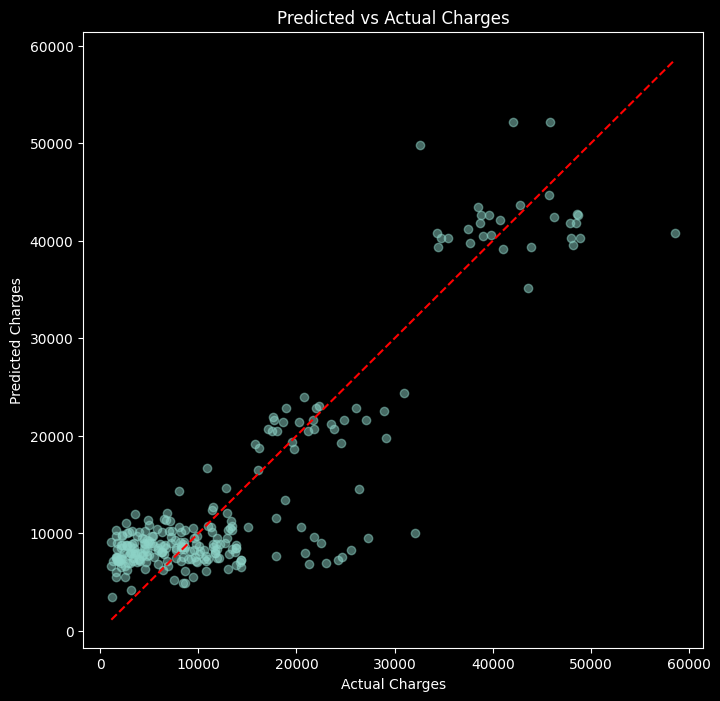

In [419]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()